In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../reuters_unique_embeddings.csv")
df

,Unnamed: 0,test_name,acc,ductive,unique_embeddings,seed,unlabeled_amount,labeled_amount
0,0,300 80 GCN,0.886,trans,True,0,1000,400
1,1,None 200 GCN,0.878,trans,True,0,1000,400
2,2,300 80 GCN,0.857,trans,False,0,1000,400
3,3,None 200 GCN,0.882,trans,False,0,1000,400
4,4,300 80 GCN,0.883,trans,True,1,1000,400
5,5,None 200 GCN,0.906,trans,True,1,1000,400
6,6,300 80 GCN,0.891,trans,False,1,1000,400
7,7,None 200 GCN,0.905,trans,False,1,1000,400
8,8,300 80 GCN,0.874,trans,True,2,1000,400
9,9,None 200 GCN,0.891,trans,True,2,1000,400


In [31]:
names = []
means = []
stds = []

for embs, sub_df in df.groupby("unique_embeddings"):
    for test_name, j_df in sub_df.groupby("test_name"):
        means.append(j_df["acc"].mean())
        stds.append(j_df["acc"].std())
        
        name = ""
        if embs:
            name += 'Documents in Vocab'
        else:
            name += 'No Document Entires'
            
        if 'None' in test_name:
            name += ', with embedding layer'
        else:
            name += ', without embedding layer'
            
        names.append(name)
        print(embs, test_name, j_df['acc'].mean())
        
custom_ordering = [0, 2, 1, 3]

names = [names[i] for i in custom_ordering]
means = [means[i] for i in custom_ordering]
stds = [stds[i] for i in custom_ordering]

False 300 80 GCN 0.8722999999999999
False None 200 GCN 0.8857999999999999
True 300 80 GCN 0.8751999999999999
True None 200 GCN 0.8865999999999999


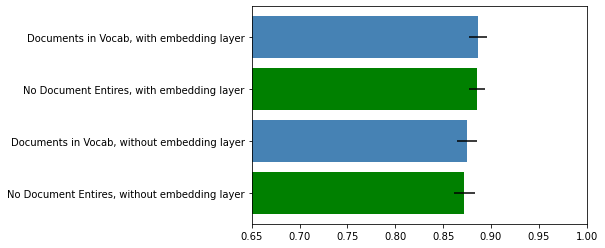

In [34]:
fig, ax = plt.subplots()

ax.barh(y=range(len(means)), width=means, xerr=stds, color=['green', 'steelblue',  'green', 'steelblue', ])
ax.set_yticks(range(len(names)))
ax.set_yticklabels(names)

ax.set_xlim(0.65, 1)

plt.show()